# Machine Learning in Business Project

In working for the OilyGiant mining company. The company is trying to figure out where the best place for a new well should be developed. They have some parameters and data that will help us in our project that will hopefully help point to what location they should develop next. You have data on oil samples from three regions. Parameters of each oil well in the region are already known. Build a model that will help to pick the region with the highest profit margin. Analyze potential profit and risks using the Bootstrapping technique.

Steps to choose the location:

1. Collect the oil well parameters in the selected region: oil quality and volume of reserves;
2. Build a model for predicting the volume of reserves in the new wells;
3. Pick the oil wells with the highest estimated values;
4. Pick the region with the highest total profit for the selected oil wells.
5. You have data on oil samples from three regions. Parameters of each oil well in the region are already known. Build a    model that will help to pick the region with the highest profit margin. Analyze potential profit and risks using the Bootstrapping technique.

# Initialize 

Setting up the Python library imports that will help with the project. This involves toolkits for data analysis, machine learning and statistics.

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

# Download Data For Project

Loading the CSV files 

In [2]:
df0 = pd.read_csv('/datasets/geo_data_0.csv')
df1 = pd.read_csv('/datasets/geo_data_1.csv')
df2 = pd.read_csv('/datasets/geo_data_2.csv')


# Prepare Data

Will now do some exploratory data analysis

In [3]:
# Check for any duplicate rows
print("df0 NUMBER OF DUPLICATED ROWS:", df0.duplicated().sum())
print("df1 NUMBER OF DUPLICATED ROWS:", df1.duplicated().sum())
print("df2 NUMBER OF DUPLICATED ROWS:", df2.duplicated().sum())

df0 NUMBER OF DUPLICATED ROWS: 0
df1 NUMBER OF DUPLICATED ROWS: 0
df2 NUMBER OF DUPLICATED ROWS: 0


In [4]:
# Check for any Null Values
print("df0 PERCENTAGE OF NULL VALUES:")
print(df0.isnull().sum())

print("df0 PERCENTAGE OF NULL VALUES:")
print(df1.isnull().sum())

print("df0 PERCENTAGE OF NULL VALUES:")
print(df2.isnull().sum())

df0 PERCENTAGE OF NULL VALUES:
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64
df0 PERCENTAGE OF NULL VALUES:
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64
df0 PERCENTAGE OF NULL VALUES:
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64


In [5]:
# Analyze data info
print("df0:")
df0.info()
print(df0.head())

print("df1:")
df1.info()
print(df1.head())

print("df2:")
df2.info()
print(df2.head())

df0:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
      id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647
3  iJLyR -0.032172  0.139033  2.978566  168.620776
4  Xdl7t  1.988431  0.155413  4.751769  154.036647
df1:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non

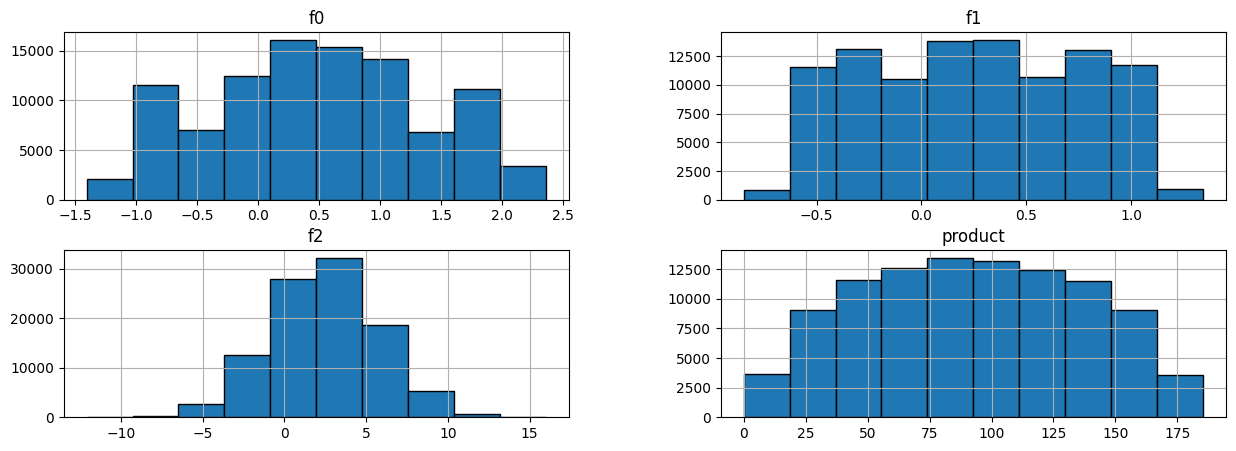

In [6]:
df0.hist(edgecolor='black', figsize=(15,5));



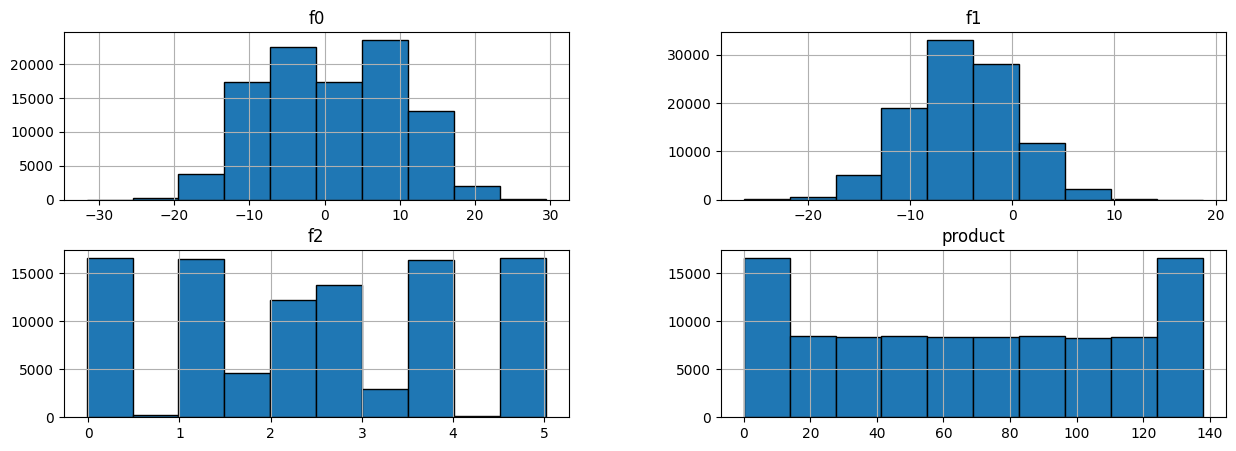

In [7]:
df1.hist(edgecolor='black', figsize=(15,5));


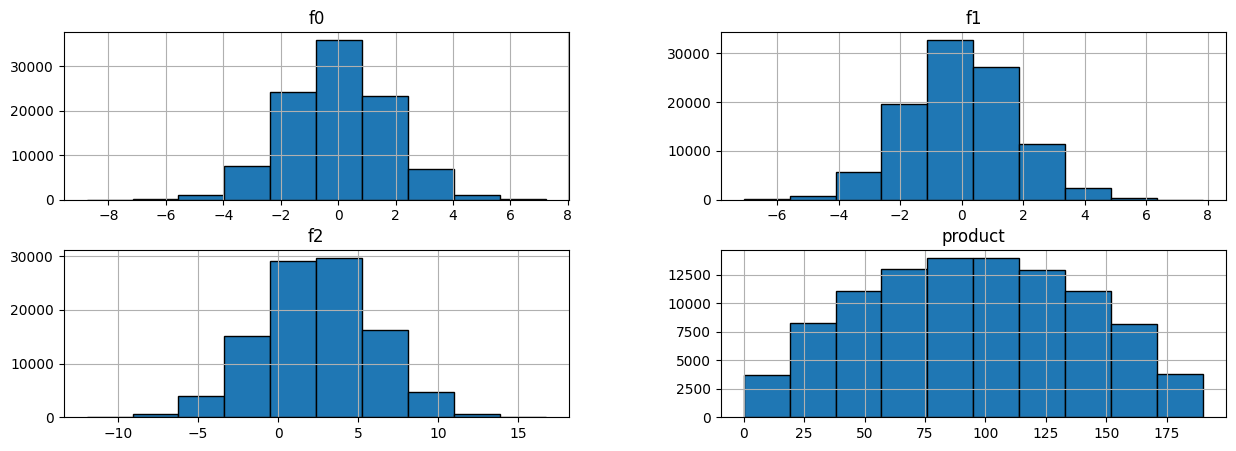

In [8]:
df2.hist(edgecolor='black', figsize=(15,5));


There are a 100,000 entries. The datasets includes four numerical columns: 'f0', 'f1', and 'f2', which are features representing various geological parameters, and 'product', which indicates the volume of oil reserves in thousand barrels. There were no missing values in the datasets and no duplicates as well. This would indicate that the data is complete. Utilized graphs to get a better visualization of the data and by looking at it df0 and df2 datasets seem more consistent and less erratic that df1, especially looking at the quality of f2 data.  

# Split Data

The 'split_data' function extracts geological features ('f0', 'f1', 'f2') and the target variable ('product') from each region's dataset ('geo_data_0', 'geo_data_1', 'geo_data_2'). It divides the data into training and validation sets using a 75:25 split ratio, ensuring the model is trained on a majority of the data while validating its performance on unseen samples. The 'print_sizes' function provides concise feedback on the sizes of these subsets, verifying the integrity of the data split process.

In [9]:
# Split Data function
def split_data(data):
    # Extract features by dropping 'id' and 'product' columns
    features = data.drop(['id', 'product'], axis=1)
    
    # Extract target labels from the 'product' column
    target = data['product']
    
    # Split data into training and validation sets (75% training, 25% validation)
    features_train, features_valid, target_train, target_valid = train_test_split(
        features, 
        target, 
        test_size=0.25,  # 25% of the data will be validation set
        random_state=12345  # Set random seed for reproducibility
    )
    
    return features_train, features_valid, target_train, target_valid

# Print Sizes function
def print_sizes(features_train, features_valid, target_train, target_valid):
    print("---------")
    print("Training Features Size:", features_train.shape)
    print("Validation Features Size:", features_valid.shape)
    print("Training Target Size:", target_train.shape)
    print("Validation Target Size:", target_valid.shape)

# Split data for Region 0 and print subsets
features_train_0, features_valid_0, target_train_0, target_valid_0 = split_data(df0)
print("REGION 0:")
print_sizes(features_train_0, features_valid_0, target_train_0, target_valid_0)
print()

# Split data for Region 1 and print subsets
features_train_1, features_valid_1, target_train_1, target_valid_1 = split_data(df1)
print("REGION 1:")
print_sizes(features_train_1, features_valid_1, target_train_1, target_valid_1)
print()

# Split data for Region 2 and print subsets
features_train_2, features_valid_2, target_train_2, target_valid_2 = split_data(df2)
print("REGION 2:")
print_sizes(features_train_2, features_valid_2, target_train_2, target_valid_2)

REGION 0:
---------
Training Features Size: (75000, 3)
Validation Features Size: (25000, 3)
Training Target Size: (75000,)
Validation Target Size: (25000,)

REGION 1:
---------
Training Features Size: (75000, 3)
Validation Features Size: (25000, 3)
Training Target Size: (75000,)
Validation Target Size: (25000,)

REGION 2:
---------
Training Features Size: (75000, 3)
Validation Features Size: (25000, 3)
Training Target Size: (75000,)
Validation Target Size: (25000,)


# Train and Evaluate the Models

The 'train_model' function initializes a linear regression model and fits it to the training data ('features_train' and 'target_train'). This enables the model to learn the relationship between geological features and oil reserve volumes. After training, predictions are generated for the validation set ('features_valid') to evaluate how well the model generalizes to new data.

The evaluate_model function then quantifies the model's performance by computing the Root Mean Squared Error (RMSE) between the predicted and actual oil reserve volumes ('target_valid'). It also provides insights into the average actual and predicted volumes, offering a comparative view through a DataFrame ('act_vs_pred').

In [10]:
# Train Model function
def train_model(features_train, features_valid, target_train):
    # Initialize a Linear Regression model
    model = LinearRegression()
    
    # Train the model on the training set
    model.fit(features_train, target_train)
    
    # Get predictions on the validation set
    predictions = model.predict(features_valid)
    
    return predictions

In [11]:
# Evaluate Model function
def evaluate_model(target_valid, predictions):
    # Display results of model
    print("---------")
    rmse = mean_squared_error(target_valid, predictions) ** 0.5
    print("RMSE:", rmse)
    print("Average ACTUAL Volume:", target_valid.mean())
    print("Average PREDICTED Volume:", predictions.mean())

    # Create a DataFrame to compare actual and predicted volumes
    act_vs_pred = pd.DataFrame({'ACTUAL': target_valid, 'PREDICTIONS': predictions})

    # Display the DataFrame for comparison
    display(act_vs_pred)

In [12]:
# Train the model for Region 0
predictions_0 = train_model(features_train_0, features_valid_0, target_train_0)

# Evaluate the model for Region 0
print("REGION 0:")
evaluate_model(target_valid_0, predictions_0)

REGION 0:
---------
RMSE: 37.5794217150813
Average ACTUAL Volume: 92.07859674082927
Average PREDICTED Volume: 92.59256778438035


,ACTUAL,PREDICTIONS
71751,10.038645,95.894952
80493,114.551489,77.572583
2655,132.603635,77.892640
53233,169.072125,90.175134
91141,122.325180,70.510088
...,...,...
12581,170.116726,103.037104
18456,93.632175,85.403255
73035,127.352259,61.509833
63834,99.782700,118.180397


In [13]:
# Train the model for Region 1
predictions_1 = train_model(features_train_1, features_valid_1, target_train_1)

# Evaluate the model for Region 1
print("REGION 1:")
evaluate_model(target_valid_1, predictions_1)

REGION 1:
---------
RMSE: 0.893099286775617
Average ACTUAL Volume: 68.72313602435997
Average PREDICTED Volume: 68.728546895446


,ACTUAL,PREDICTIONS
71751,80.859783,82.663314
80493,53.906522,54.431786
2655,30.132364,29.748760
53233,53.906522,53.552133
91141,0.000000,1.243856
...,...,...
12581,137.945408,136.869211
18456,110.992147,110.693465
73035,137.945408,137.879341
63834,84.038886,83.761966


In [14]:
# Train the model for Region 2
predictions_2 = train_model(features_train_2, features_valid_2, target_train_2)

# Evaluate the model for Region 2
print("REGION 2:")
evaluate_model(target_valid_2, predictions_2)

REGION 2:
---------
RMSE: 40.02970873393434
Average ACTUAL Volume: 94.88423280885438
Average PREDICTED Volume: 94.96504596800489


,ACTUAL,PREDICTIONS
71751,61.212375,93.599633
80493,41.850118,75.105159
2655,57.776581,90.066809
53233,100.053761,105.162375
91141,109.897122,115.303310
...,...,...
12581,28.492402,78.765887
18456,21.431303,95.603394
73035,125.487229,99.407281
63834,99.422903,77.779912


The evaluation results show varying levels of model performance across the three regions considered for oil well development. In Region 0, the model exhibits a RMSE of approximately 37.58, indicating a moderate level of error in predicting oil reserve volumes. The average actual and predicted volumes are close, with actual slightly lower at 92.08 compared to predicted at 92.59, suggesting reasonable accuracy. Region 1 demonstrates the best performance with a significantly lower RMSE of about 0.89, indicating highly accurate predictions. Both actual and predicted volumes align closely around 68.72 and 68.73 respectively, indicating precise estimation. Conversely, Region 2 displays a higher RMSE of about 40.03, indicating less accurate predictions compared to the other regions. The average actual and predicted volumes are similar at around 94.88 and 94.97 respectively, showing moderate accuracy but with notable variability in predictions. These results suggest that Region 1 shows the most promising potential for oil well development based on the model's performance metrics.

# Calculate the volume of reserves sufficient for developing a new well without losses.

Here we are going to calculate the minimum volume of oil reserves required for each of the regions to break even on the drilling costs. By using the fixed budget and the average revenue per unit of oil produced. In dividing the total budget ("BUDGET") by the number of wells ("TARGET_WELLS"), will get the cost per well ("WELL_COST").The "break_even_volume" is the minimum volume of reserves each well needs to yield in order to cover the costs at the average revenue per unit ("UNIT_REVENUE"). The function, "calculate_break_even, will compute and print the average volume of reserves for each of the regions. 

In [15]:
# Constants
BUDGET = 100000000 # Total budget available for development
UNIT_REVENUE = 4500 # Average revenue per unit of oil produced
TARGET_WELLS = 200 # Number of wells to be drilled per region
TOTAL_WELLS = 500 # Total number of available wells
WELL_COST = BUDGET / TARGET_WELLS # Cost of one well

# Minimum volume of reserves to cover the well cost
break_even_volume = WELL_COST / UNIT_REVENUE
print("Minimum Volume of Reserves to Break-Even::", break_even_volume)
print()

# Calculate Break-Even function
def calculate_break_even(data, break_even_volume):
    print("---------")
    avg_volume = data['product'].mean()
    print("Average Volume of Reserves:", avg_volume)
    print("Difference from Breaking Even:", break_even_volume - avg_volume)

print("REGION 0:")
calculate_break_even(df0, break_even_volume)
print()

print("REGION 1:")
calculate_break_even(df1, break_even_volume)
print()

print("REGION 2:")
calculate_break_even(df2, break_even_volume)

Minimum Volume of Reserves to Break-Even:: 111.11111111111111

REGION 0:
---------
Average Volume of Reserves: 92.50000000000001
Difference from Breaking Even: 18.6111111111111

REGION 1:
---------
Average Volume of Reserves: 68.82500000000002
Difference from Breaking Even: 42.2861111111111

REGION 2:
---------
Average Volume of Reserves: 95.00000000000004
Difference from Breaking Even: 16.11111111111107


Above we see that Region 0 is short of the minimum volume needed to break even on drilling costs by about 18.61 units of oil reserves per well. In Region 1 falls even shorter than Region 0  at the average reserve volume at 442.29 units well below the break-even point. Region 2 got the closest to the break-even point at 16.11 units. This would help lead us to think that Region 2 has the better chance to generate profit from the oil development with the given budget and revenue conditions.

# Calculating Profit

We will use the function "calculate_profit" to  calculate potential profits from drilling operations in each of the regions based pon model predictions of oil reserves. The predictions will be sorted in descending order in order to highlight the wells with higher estimated reserves. We will then take the top 200 wells, based on the those sorted predictions and then calculate the total reserves in those wells and calculate the profits by subtracting the total drilling costs from the revenue generated.  It outputs the computed profits for Regions 0, 1, and 2 based on the model predictions and validation data. The 'analyze_profit_and_units' function complements this by providing a detailed analysis of the computed profits and the total units of reserves for the top 200 locations, offering a comprehensive view of the financial and operational outcomes for each region, and facilitating easier comparison of potential returns and strategic advantages of drilling in each area.  

In [16]:
# Calculate Profit function
def calculate_profit(target_valid, predictions):
    # Convert the target values to a pandas Series and reset the index for consistent indexing
    target_series = pd.Series(target_valid).reset_index(drop=True)

    # Convert the predictions to a pandas Series and sort them in descending order
    predictions_sorted = pd.Series(predictions).sort_values(ascending=False)

    # Select the top 200 wells based on the sorted predictions
    top_200_wells = target_series[predictions_sorted.index][:TARGET_WELLS]

    # Calculate the total units in the selected top wells
    total_units = top_200_wells.sum()

    # Calculate the profit based on total units and revenue per unit
    profit = total_units * UNIT_REVENUE - BUDGET

    return profit


In [17]:
# Profits and Units function
def profits_and_units(profit):
    print("-----------------------------")
    print("Total Profit:", profit)
    total_units = (profit + BUDGET) / UNIT_REVENUE
    print("Total Units:", total_units)
    profit_per_unit = profit/total_units
    print("Profit per Unit:", profit_per_unit)

# Print profits and units of Region 0's top 200 loctions
profit_0 = calculate_profit(target_valid_0, predictions_0)
print("REGION 0 (Top 200 Locations):")
profits_and_units(profit_0)
print()

# Print profits and units of Region 1's top 200 loctions
profit_1 = calculate_profit(target_valid_1, predictions_1)
print("REGION 1 (Top 200 Locations):")
profits_and_units(profit_1)
print()

# Print profits and units of Region 2's top 200 loctions
profit_2 = calculate_profit(target_valid_2, predictions_2)
print("REGION 2 (Top 200 Locations):")
profits_and_units(profit_2)

REGION 0 (Top 200 Locations):
-----------------------------
Total Profit: 33208260.43139851
Total Units: 29601.83565142189
Profit per Unit: 1121.8311196117795

REGION 1 (Top 200 Locations):
-----------------------------
Total Profit: 24150866.966815114
Total Units: 27589.081548181137
Profit per Unit: 875.3777078312092

REGION 2 (Top 200 Locations):
-----------------------------
Total Profit: 27103499.635998324
Total Units: 28245.22214133296
Profit per Unit: 959.5782076125404


The calculated profits that we see indicate the potential results of drilling operationsin each of the regions based on the model's predictions of oil reserves. In the Region 0, the projected the highest outcome at 33.2 million USD, followed by Region 2 at 27.1 million USD and pulling last in Region 1 at 24.2 million USD. We also see that Region 0 had the highest amount of total units of reserves at 29,601.84 units, the Region 2 behind that at 28.245.22 units and lastly in Region 1 had 27,589.08 units. We lastly see that in Region 0, the profit per unit is at the top at about 1121.83 USD, with Region 2 second, at about 959.57 USD, and then lastly in Region 1, we land at about 875.37 USD. What we take away from this is that these numbers help reflect how potentially profitable each of these regions are and where more of the focus and resources one may want to devote to. The numbers would suggest Region 0 is the best region to invest in if there is to be one to focus on and to be the most profitable.

# Profit and Risk

We will now use the "bootstrap_profit" function to do a thorough bootstrap analysis that will simulate the profit distribution from the oil wells. For each bootstrap sample, the function calculates the profit. This process is repeated 1000 times, resulting in a distribution of potential profits. The function will then calculate the 95% confidence interval for the profit distribution using t-distribution. It will then calculate the risk of loss by determining the proportion of profits that are negative. The results, including the average profit, the 95% confidence interval, and the risk of loss, are printed for each region.

In [18]:
# Bootstrap Profit function
def bootstrap_profit(target, predictions):
    # Convert target to pandas Series and reset index for consistent indexing
    target = pd.Series(target).reset_index(drop=True)

    # Initialize a random state for reproducibility
    state = np.random.RandomState(12345)

    # Initialize a list to store profit values from bootstrap samples
    profits = []

    # Perform 1000 bootstrap iterations
    for i in range(1000):
        # Randomly sample 500 wells with replacement from the target data
        target_subsample = target.sample(n=TOTAL_WELLS, replace=True, random_state=state)

        # Select the corresponding predictions for the sampled wells
        predictions_subsample = predictions[target_subsample.index]

        # Calculate profit for the bootstrap sample and append to the series
        profits.append(calculate_profit(target_subsample, predictions_subsample))
        
        # Convert the profit list to a pandas Series
        profit_distribution = pd.Series(profits)

    # Calculate the 95% confidence interval for the profit distribution using t-distribution
    confidence_interval = st.t.interval(0.95, len(profit_distribution) - 1, profit_distribution.mean(), profit_distribution.sem())

    # Calculate the risk of loss, defined as the proportion of negative profits
    risk_of_loss = (profit_distribution < 0).mean()

    # Print the results
    print("---------")
    print("Average Profit:", profit_distribution.mean())
    print("95% Confidence Interval:", confidence_interval)
    print(f"Risk of Loss: {100 * risk_of_loss:.1f}%")
    print()
    print("Profit Distribution:")
    display(profit_distribution)

# Analyze Region 0
print("REGION 0:")
bootstrap_profit(target_valid_0, predictions_0)
print()

# Analyze Region 1
print("REGION 1:")
bootstrap_profit(target_valid_1, predictions_1)
print()

# Analyze Region 2
print("REGION 2:")
bootstrap_profit(target_valid_2, predictions_2)

REGION 0:
---------
Average Profit: 3961649.8480237117
95% Confidence Interval: (3796203.1514797257, 4127096.5445676977)
Risk of Loss: 6.9%

Profit Distribution:


0      6.054641e+06
1      5.363934e+06
2      2.937858e+06
3      1.789934e+06
4      2.719929e+06
           ...     
995    5.253551e+06
996    7.790094e+06
997    6.494122e+06
998    3.149995e+06
999    2.197184e+06
Length: 1000, dtype: float64


REGION 1:
---------
Average Profit: 4560451.057866608
95% Confidence Interval: (4431472.486639005, 4689429.62909421)
Risk of Loss: 1.5%

Profit Distribution:


0      2.280162e+06
1      3.343157e+06
2      2.537047e+06
3      6.139661e+06
4      3.571430e+06
           ...     
995    6.831945e+06
996    6.468698e+06
997    2.386523e+06
998    4.142425e+06
999    1.245778e+06
Length: 1000, dtype: float64


REGION 2:
---------
Average Profit: 4044038.665683568
95% Confidence Interval: (3874457.974712804, 4213619.356654332)
Risk of Loss: 7.6%

Profit Distribution:


0     -7.189923e+05
1      6.459964e+06
2      6.261756e+06
3      4.123517e+06
4     -5.596049e+05
           ...     
995    5.668660e+06
996   -5.850207e+05
997    5.902561e+06
998    4.977628e+06
999    2.009241e+06
Length: 1000, dtype: float64

# Conclusion

In analyzing the profitability across three regions from the oil drilling simulations reveals financial outcomes and associated risks in each of the regions. Region 0 emerges with the lowest average profit at approximately 3,961,649 USD and carries a moderate risk of loss with 6.9% of the profit distribution falling below zero. Region 2, while profitable with an average profit of 4,044,038 USD, exhibits a higher risk of loss at 7.6%, indicating greater variability in returns. Region 1, with an average profit of 4,560,451 USD, demonstrates a narrower 95% confidence interval and a lower risk of loss at 1.5%, making it a more stable investment option compared to Regions 0 and 2. These findings highlight Region 1 as potentially the most reliable and the "safe" choice for investors seeking both profitability and has a lower financial risk in investing in. While in Regions 0 and 2, it may require additional thought and weighing the risk that is involved in those regions despite their higher average profits.